In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [64]:
# Step 1: Load the Dataset
data = pd.read_csv('Mall_Customers.csv')

In [65]:
# Inspect the dataset
print("Dataset Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())
print("\nData Types:\n", data.dtypes)
print("\nSummary Statistics:\n", data.describe())

Dataset Shape: (200, 5)

Missing Values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Duplicate Rows: 0

Data Types:
 CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

Summary Statistics:
        CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


In [66]:
# Selecting relevant features for clustering (Age, Annual Income, Spending Score)
data_selected = data[['Age', 'Annual_Income_(k$)', 'Spending_Score']]


In [67]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

In [68]:
# Ensure 'data_scaled' is a NumPy array
print("Shape of scaled data:", data_scaled.shape)

Shape of scaled data: (200, 3)


In [69]:
import os
os.environ["OMP_NUM_THREADS"] = "1"



In [70]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

In [71]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

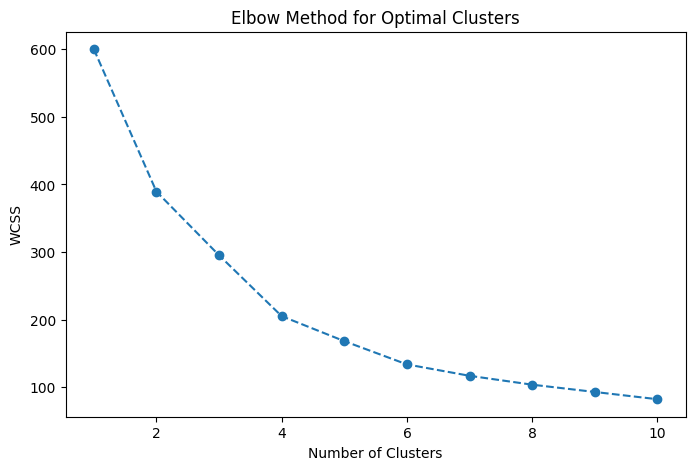

In [72]:
# Plot the WCSS values to visualize the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
# Silhouette Score Evaluation
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}')

For n_clusters = 2, the silhouette score is 0.335
For n_clusters = 3, the silhouette score is 0.358
For n_clusters = 4, the silhouette score is 0.404
For n_clusters = 5, the silhouette score is 0.408
For n_clusters = 6, the silhouette score is 0.431
For n_clusters = 7, the silhouette score is 0.410
For n_clusters = 8, the silhouette score is 0.367
For n_clusters = 9, the silhouette score is 0.374
For n_clusters = 10, the silhouette score is 0.362


In [74]:
# Step 4: Apply K-Means Clustering (Choose Optimal Clusters from Elbow Method or Silhouette)
kmeans = KMeans(n_clusters=5, random_state=42)  # Example: 5 clusters
cluster_labels = kmeans.fit_predict(data_scaled)
data['Cluster'] = cluster_labels

In [75]:
# Step 5: Visualization
# PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

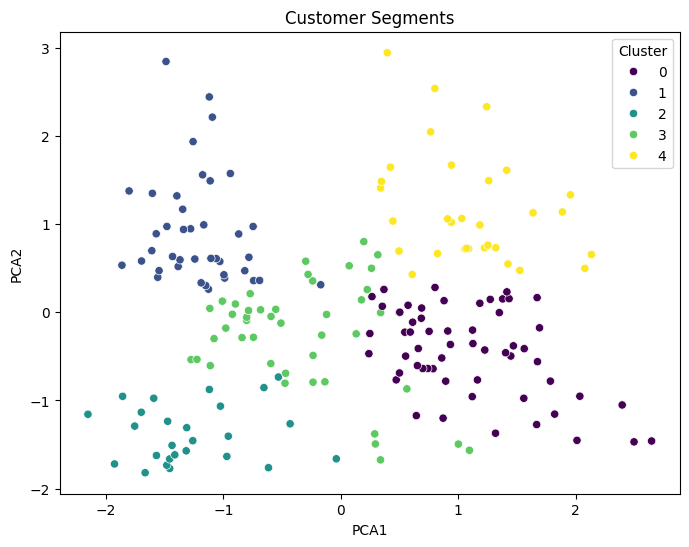

In [76]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

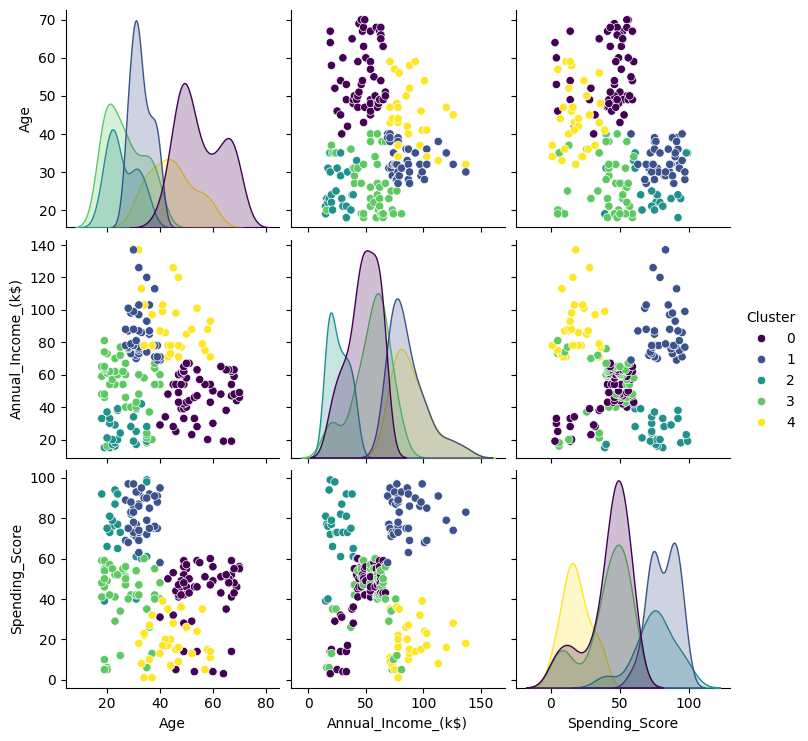

In [77]:
# Pair Plot for features
sns.pairplot(data, vars=['Age', 'Annual_Income_(k$)', 'Spending_Score'], hue='Cluster', palette='viridis')
plt.show()


In [78]:
# Deliverables
# Save clustered dataset
data.to_csv('Clustered_Customers.csv', index=False)

In [79]:
# Recommendations (example):
print("\nRecommendations:")
print("1. Target high-spending customers in Cluster X with loyalty programs.")
print("2. Offer discounts to customers in Cluster Y to increase spending.")
print("3. Tailor promotions for different age groups in respective clusters.")


Recommendations:
1. Target high-spending customers in Cluster X with loyalty programs.
2. Offer discounts to customers in Cluster Y to increase spending.
3. Tailor promotions for different age groups in respective clusters.
